::: {#fig-lego}

<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="logo" width="800" height="400"></p>

Lego Toys

:::

# Introduction

<p style="text-align:justify;"
<b>LEGO</b> is a Danish toy production company. The company is best known for its colorful interlocking plastic bricks, and the vast possibilities of what can be built with them. The Lego Group also produces a variety of other toys, including board games, video games, and clothing.
</p>

In addition to its traditional brick-based toys, Lego also produces a variety of other products, including:

* **Lego Technic**: A line of more complex, motorized sets that allow users to build working vehicles and machines.
* **Lego Creator**: A line of sets that allow users to build a variety of different models, from buildings to vehicles to animals.
* **Lego City**: A line of sets that allow users to build cityscapes and play out scenes from everyday life.
* **Lego Friends**: A line of sets that are specifically designed for girls, and feature female characters and settings.
* **Lego Ninjago**: A line of sets that are based on the popular Lego Ninjago: Masters of Spinjitzu television series.
* **The Lego Movie**: A computer-animated comedy film that was released in 2014, and is based on the Lego brand.

Lego products are popular with children of all ages, and they are also enjoyed by adults. Lego bricks are a great way to encourage creativity and problem-solving skills, and they can also be used to build models of just about anything you can imagine. 

Lego was derived from the Danish phrase leg godt, which means "play well".

In this project, we will show a summary of lego blocks.

## Reading datasets

A comprehensive database of lego blocks is provided by [Rebrickable](https://rebrickable.com/downloads).

The data is available as csv file and the schema is shown below

::: {fig-catalog}

<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>

Database schema

:::

Let us start by reading in the colors data to get a sense of the diversity of lego sets!

# Environment settings

In [1]:
# Import libraries
import polars as pl
import duckdb as db
import matplotlib.pyplot as plt
import seaborn as sns
import json
plt.style.use('ggplot')

In [2]:
# get token
filename = 'credentials.json'

# read json file
with open(filename) as f:
    keys = json.load(f)

# read credentials
token = keys['md_token']

In [3]:
# connect to motherduck cloud
conn = db.connect(f'md:?motherduck_token={token}')

In [4]:
# retrieve dataframe
colors = conn.execute('select * from projects.colors').pl()

In [5]:
colors.head()

id,name,rgb,is_trans
i64,str,str,bool
-1,"""Unknown""","""0033B2""",false
0,"""Black""","""05131D""",false
1,"""Blue""","""0055BF""",false
2,"""Green""","""237841""",false
3,"""Dark Turquoise""","""008F9B""",false


# Exploring the Colors dataset

Now that we have read the `colors` dataset, we can start exploring it! Let us start by understanding the number of colors available.

In [6]:
# How many distinct colors are available?
colors.shape

(135, 4)

# Transparent Colors in Lego Sets

The `colors` data has a column named `is_trans` that indicates whether a color is transparent or not.

We shall to explore the distribution of transparent vs. non-transparent colors.

In [7]:
# Distribution of colors based on transparency
colors_summary = colors.group_by('is_trans').agg(pl.len())
colors_summary

is_trans,len
bool,u32
true,28
false,107


# Exploring Lego Sets

Another interesting dataset available in this database is the `sets` data.

It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained.

::: {fig-data}

![](https://imgur.com/1k4PoXs.png)

Sets data

:::

Let us use this data to explore how the average number of parts in Lego sets has varied over the years.

In [10]:
# Read sets data
sets = conn.sql('select * from projects.sets').pl()
sets.head()

set_num,name,year,theme_id,num_parts
str,str,i64,i64,i64
"""00-1""","""Weetabix Castle""",1970,414,471
"""0011-2""","""Town Mini-Figures""",1978,84,12
"""0011-3""","""Castle 2 for 1 Bonus Offer""",1987,199,2
"""0012-1""","""Space Mini-Figures""",1979,143,12
"""0013-1""","""Space Mini-Figures""",1979,143,12


In [11]:
# Create a summary of average number of parts by year
parts_by_year = sets.group_by('year').agg(pl.col('num_parts').mean())
parts_by_year.head()

year,num_parts
i64,f64
1983,116.105263
2001,104.365782
2013,181.359191
1995,179.039062
1977,91.5


# Lego Themes Over Years

Lego blocks ship under multiple [themes](https://shop.lego.com/en-US/Themes). 

Let us try to get a sense of how the number of themes shipped has varied over the years.

In [12]:
# Number of themes shipped by year
sets.head()

set_num,name,year,theme_id,num_parts
str,str,i64,i64,i64
"""00-1""","""Weetabix Castle""",1970,414,471
"""0011-2""","""Town Mini-Figures""",1978,84,12
"""0011-3""","""Castle 2 for 1 Bonus Offer""",1987,199,2
"""0012-1""","""Space Mini-Figures""",1979,143,12
"""0013-1""","""Space Mini-Figures""",1979,143,12


In [13]:
themes_by_year = sets.group_by('year', maintain_order=True).agg(pl.col('theme_id').len()).sort('year')
themes_by_year.tail()

year,theme_id
i64,u32
2013,593
2014,715
2015,670
2016,609
2017,470


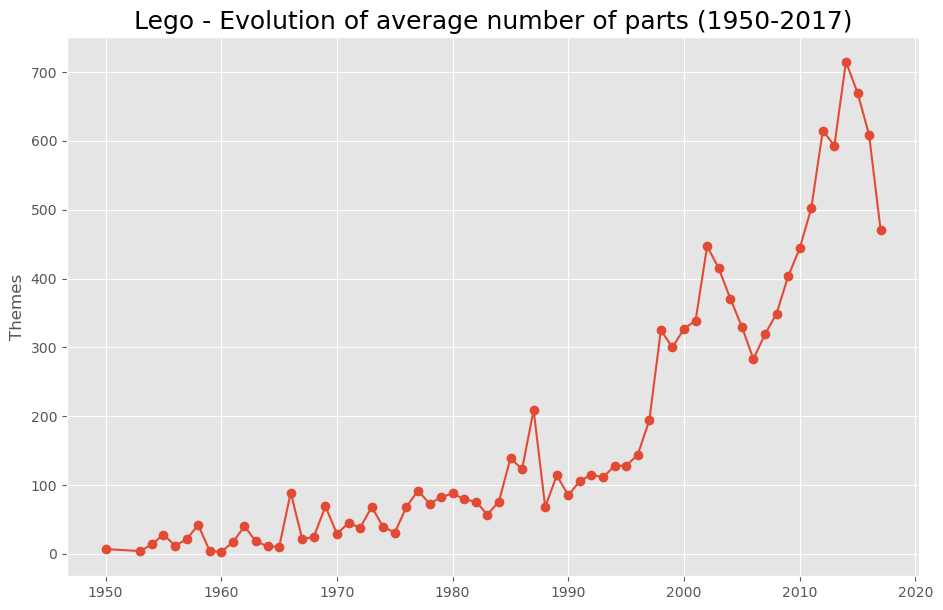

In [14]:
# Plot trends in average number of parts by year
plt.figure(figsize=(11, 7))
plt.plot(themes_by_year['year'], themes_by_year['theme_id'], marker='o', linestyle='-')
plt.title('Lego - Evolution of average number of parts (1950-2017)', fontsize = 18)
plt.xlabel('')
plt.ylabel('Themes')
plt.legend('',frameon=False)
plt.show()

In [15]:
# close connection
conn.close()

# Contact

**Jesus L. Monroy**
<br>
*Economist & Data Scientist*

[Medium](https://medium.com/@jesuslm) | [Linkedin](https://www.linkedin.com/in/j3sus-lm) | [Twitter](https://x.com/j3suslm)